# Flight Take Off Data - JFK Airport

 Complete the Kaggle task "Predicting Taxi out Delay", using linear regression and submit a link to your notebook

## Context
This data was scraped under a Academic Paper under Review by IEEE transportation

## Content
This file contains data about flights leaving from JKF ariport between Nov -January. Taxi-Out prediction has been an important concept as it helps in calculating Runway time and directly impact the cost of the flight.

Taxi-out refers to the time a plane spends moving on the airport's taxiways from its gate to the runway prior to takeoff. During this time, the plane is under the control of the airport's ground traffic control and may have to wait for other planes to clear the runway or for air traffic control to clear it for takeoff. The length of the taxi-out time can vary depending on a number of factors, including the size and type of plane, the traffic congestion at the airport, and the weather conditions.

Taxi-out time is an important factor in calculating the overall runway time for a flight, as longer taxi-out times can increase fuel consumption, affect the scheduling of other flights, and negatively impact the efficiency of an airline's operations. That's why accurate taxi-out prediction is crucial for airlines to minimize costs and optimize their operations.



### First Step: Import all the Libraries Necessary

In [68]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

### 2rd step : Import dataset

In [2]:
data_flights= pd.read_csv('M1_final.csv')  


### 3th Step: Frame the Problem

### Objective: 

1-What is the average departure delay for flights in the dataset?

2-Which airline has the most number of flights in the dataset?

3-How does the distance traveled by a flight impact its elapsed time?

4-What is the correlation between the temperature and the number of flight delays?

5-What is the average taxi-out time for flights in the dataset?

6-Which day of the week has the highest number of flight delays?


##Linear regression questions

1-How does the departure delay vary with temperature?

2-Can we predict the departure delay based on the wind speed, humidity, and pressure?

3-How does the elapsed time of a flight vary with distance traveled?

4-Can we predict the taxi-out time based on the day of the week, the destination, and the weather conditions?

5-How does the arrival delay vary with the departure delay?

6-Can we predict the distance traveled based on the elapsed time and the temperature?

7-How does the wind speed impact the fuel consumption and the cost of the flight?



### 5th: Quick look at the data structure

We can see there are 22 variables of the dataset
The type of data varies between a intergen (16) ,objects (6) and floats (1)

Types of variables available:

Date of the flight (month, day of the month, day of the week), 

information about the operating carrier (OP_UNIQUE_CARRIER),

the tail number of the plane (TAIL_NUM), 

the destination of the flight (DEST),

the delay of the departure (DEP_DELAY),

the elapsed time of the flight (CRS_ELAPSED_TIME),

the distance traveled (DISTANCE),

the scheduled and actual departure time (CRS_DEP_M, DEP_TIME_M),

the scheduled and actual arrival time (CRS_ARR_M),

weather conditions (Temperature, Dew Point, Humidity, Wind, Wind Speed, Wind Gust, Pressure, Condition),

the scheduled departure and arrival times (sch_dep, sch_arr),

and the taxi-out time (TAXI_OUT).

In [3]:
data_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  object 
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

In [4]:
data_flights.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [5]:
# To find out how many categories exist under weather condition

data_flights["Condition"].value_counts()

Mostly Cloudy            9124
Fair                     5038
Cloudy                   4992
Partly Cloudy            3209
Light Rain               1865
Mostly Cloudy / Windy    1442
Fair / Windy              918
Partly Cloudy / Windy     582
Rain                      351
Cloudy / Windy            341
Light Rain / Windy        288
Light Drizzle             194
Fog                       147
Wintry Mix                 83
Light Snow                 76
Heavy Rain                 54
Fog / Windy                28
Rain / Windy               25
Light Snow / Windy         24
Light Drizzle / Windy      18
Heavy Rain / Windy          6
Drizzle and Fog             5
Light Freezing Rain         4
Wintry Mix / Windy          4
Snow                        2
Name: Condition, dtype: int64

## Describe 
 
 The mean taxi_out is 20(?mts), which can vary between 5-40minutes. 
 Wind speed mean 12.

Dep delay: It seems that the median delay is -3minutes.
Difference in minutes between scheduled and actual departure time.
Early departures show negative numbers, in minutes

Humidity:
It seems that NEWYork airports has on average, high humidity levels, 74%.

Temperatures:
The average temperature was 5 degress. 



 


In [6]:
data_flights.describe()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
count,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000
mean,7.894240,16.021096,4.008952,6.374983,225.288203,1267.746079,831.003851,828.934698,910.874289,41.489833,57.732616,12.367627,5.535323,30.092433,31.091256,28.432130,20.858570
std,4.991723,8.750179,1.985230,38.735144,119.482417,889.343246,299.398525,305.864103,345.411743,8.043533,23.468676,6.259298,11.886457,0.296160,9.510359,8.263043,6.851915
min,1.000000,1.000000,1.000000,-22.000000,57.000000,94.000000,301.000000,1.000000,1.000000,17.000000,0.000000,0.000000,0.000000,29.200000,0.000000,0.000000,5.000000
25%,1.000000,8.000000,2.000000,-6.000000,124.000000,483.000000,545.000000,542.000000,667.000000,36.000000,46.000000,8.000000,0.000000,29.880000,26.000000,21.000000,16.000000
50%,11.000000,16.000000,4.000000,-3.000000,188.000000,1029.000000,856.000000,854.000000,918.000000,42.000000,59.000000,12.000000,0.000000,30.110000,30.000000,30.000000,19.000000
75%,12.000000,24.000000,6.000000,2.000000,365.000000,2248.000000,1095.000000,1097.000000,1193.000000,47.000000,74.000000,16.000000,0.000000,30.320000,37.000000,35.000000,25.000000
max,12.000000,31.000000,7.000000,1276.000000,697.000000,4983.000000,1439.000000,1440.000000,1439.000000,68.000000,97.000000,36.000000,49.000000,30.750000,55.000000,46.000000,41.000000


<function matplotlib.pyplot.show(close=None, block=None)>

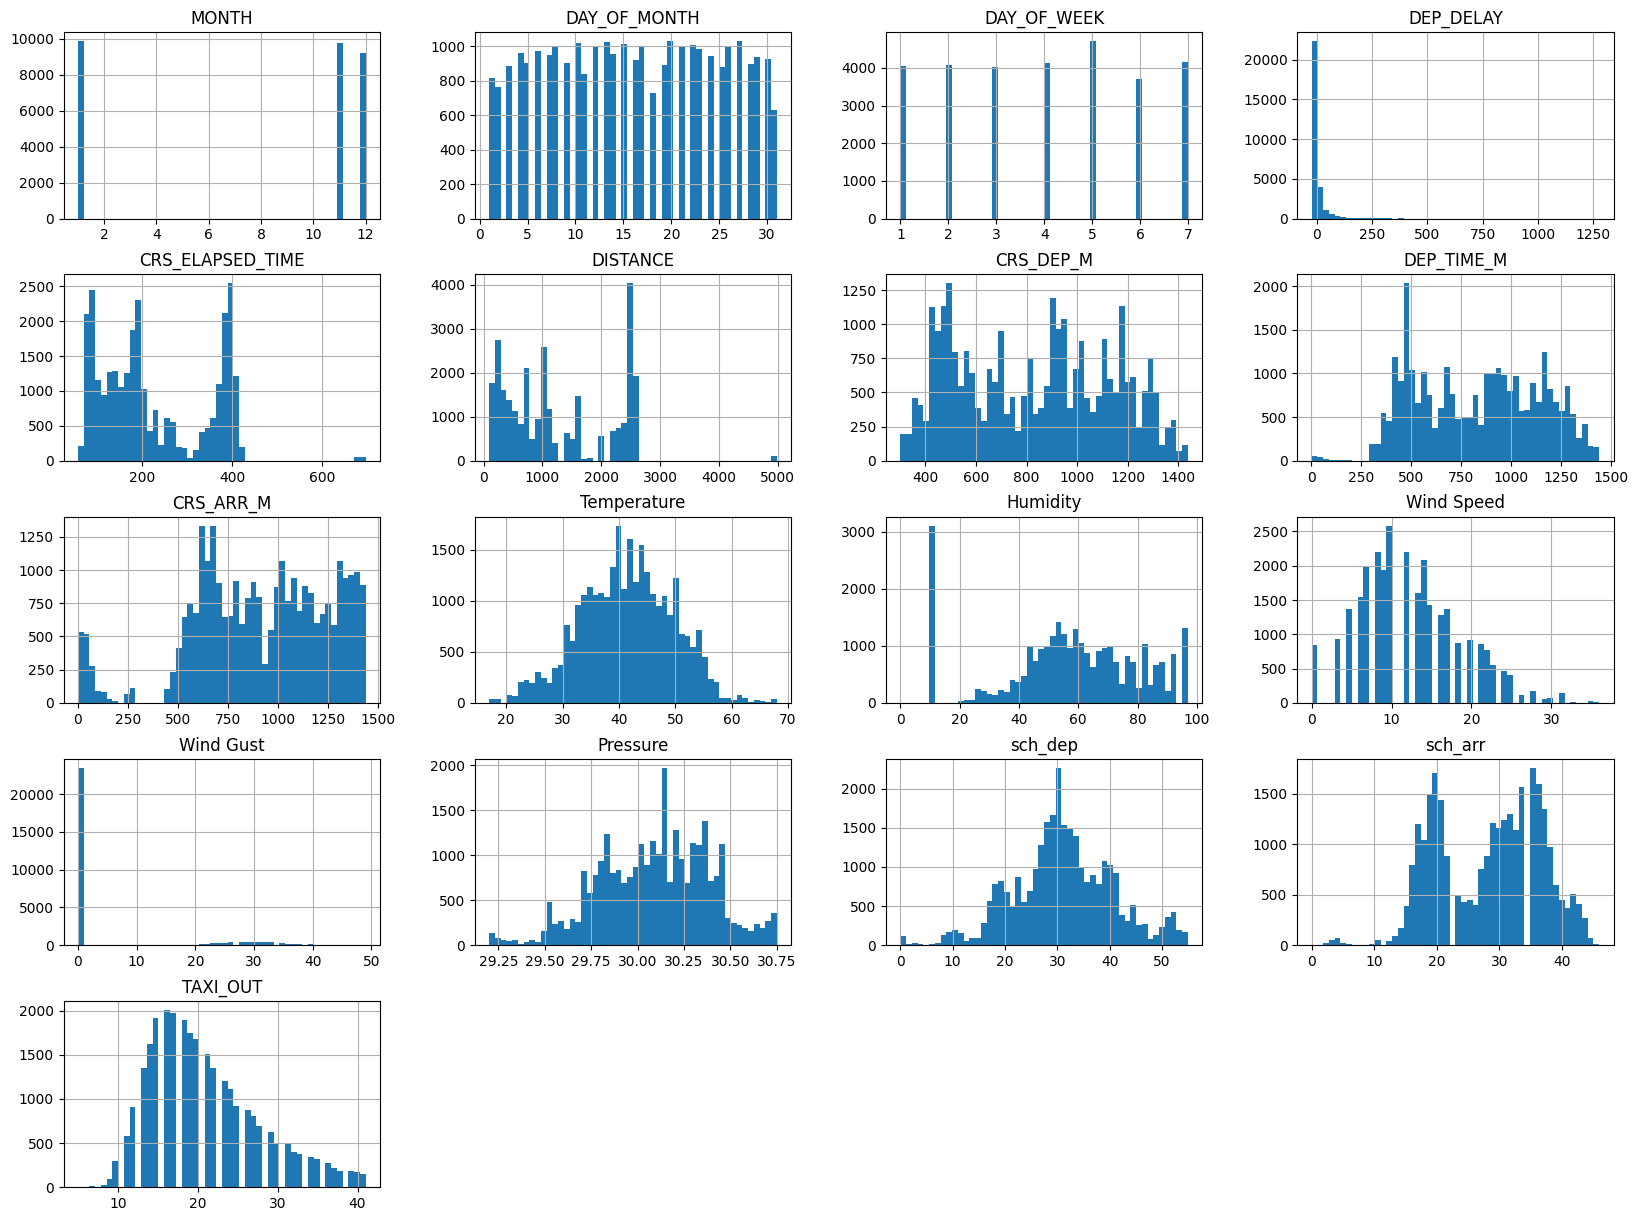

In [7]:
data_flights.hist(bins=50, figsize=(20, 15))
plt.show

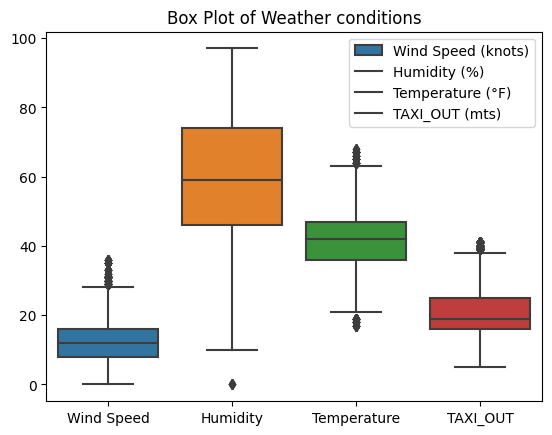

In [8]:
sns.boxplot(data=data_flights[[ "Wind Speed","Humidity","Temperature","TAXI_OUT"]])
plt.title('Box Plot of Weather conditions', loc="center")
# Add a legend for the units of each variable
plt.legend(labels=['Wind Speed (knots)', 'Humidity (%)', 'Temperature (°F)', 'TAXI_OUT (mts)'], loc='upper right')
plt.gca().set_facecolor('none') # para tirar a linhas cizentas


##For info The bbox_to_anchor argument is used to specify the position of the legend on the chart, relative to the plot area. In this case, it is set to (0.5, 1.05), which positions the legend at the top center of the plot. 
# The ncol argument is used to specify the number of columns in the legend. In this case, it is set to 3, which creates three columns in the legend to accommodate the three variables.

1-What is the average departure delay for flights in the dataset?

We can see that the mean delay is 6 minutes, however, median and mean are quite different.So the median is actually more representative, which actually is -3 minutes. 
The minimum -22 and maximum was 1276 minutes. 75% of the flights have a departue delay less than 2 minutes.

In [9]:
print(data_flights["DEP_DELAY"].describe())

count    28820.000000
mean         6.374983
std         38.735144
min        -22.000000
25%         -6.000000
50%         -3.000000
75%          2.000000
max       1276.000000
Name: DEP_DELAY, dtype: float64


Text(0.5, 0, 'Minutes')

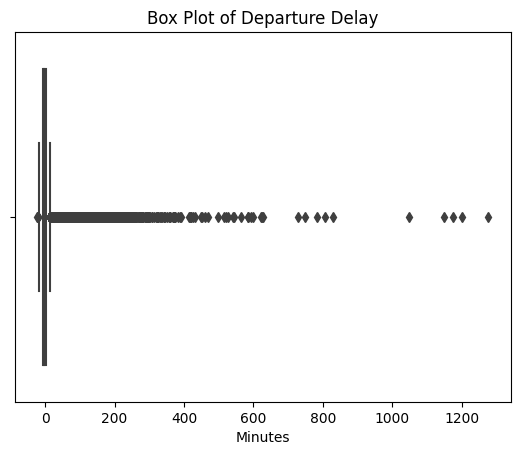

In [10]:
sns.boxplot(x=data_flights["DEP_DELAY"])
plt.title('Box Plot of Departure Delay', loc="center")
plt.gca().set_facecolor('none') # To remove the gray lines
plt.xlabel('Minutes') # Add x-axis label


2-Which airline has the most number of flights in the dataset?

Los angeles, San Francisco followed by Boston.

In [11]:
print(data_flights["DEST"].describe())

count     28820
unique       65
top         LAX
freq       2974
Name: DEST, dtype: object


<AxesSubplot: xlabel='DEST', ylabel='count'>

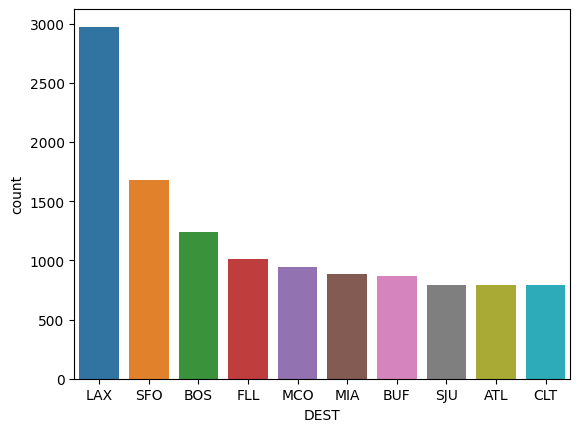

In [12]:
sns.countplot(x='DEST', data=data_flights, order=data_flights['DEST'].value_counts().iloc[:10].index)

Text(0, 0.5, 'Number of Flights')

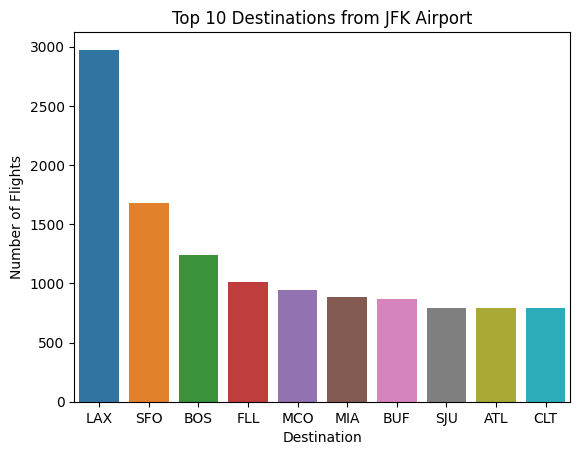

In [13]:
# Get the frequency of each destination
dest_counts = data_flights["DEST"].value_counts()

# Plot the top 10 destinations
sns.countplot(x='DEST', data=data_flights, order=dest_counts.iloc[:10].index)
plt.title('Top 10 Destinations from JFK Airport', loc="center")
plt.xlabel('Destination')
plt.ylabel('Number of Flights')

3-How does the distance traveled by a flight impact its elapsed time?

By using the scatter plot, we can see as the distance travel increases, so does the elapsed time.


array([[<AxesSubplot: xlabel='DISTANCE', ylabel='DISTANCE'>,
        <AxesSubplot: xlabel='CRS_ELAPSED_TIME', ylabel='DISTANCE'>],
       [<AxesSubplot: xlabel='DISTANCE', ylabel='CRS_ELAPSED_TIME'>,
        <AxesSubplot: xlabel='CRS_ELAPSED_TIME', ylabel='CRS_ELAPSED_TIME'>]],
      dtype=object)

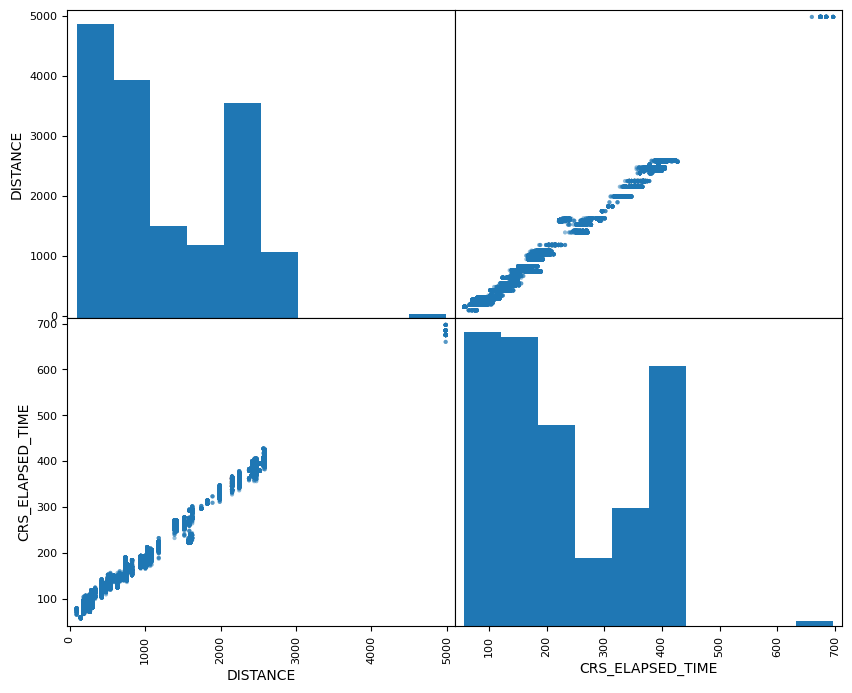

In [14]:
from pandas.plotting import scatter_matrix
attributes = ["DISTANCE",'CRS_ELAPSED_TIME']
scatter_matrix(data_flights[attributes], figsize=(10,8))

Text(0.5, 1.0, 'Elapsed Time vs Distance Traveled')

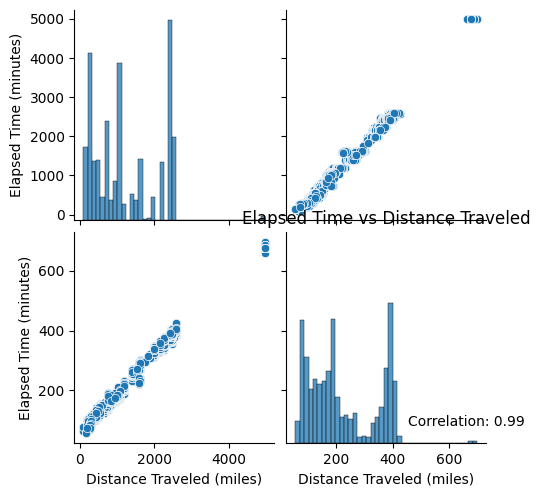

In [15]:
attributes = ["DISTANCE", "CRS_ELAPSED_TIME"]
correlation = data_flights[attributes].corr().iloc[0, 1]

g = sns.pairplot(data_flights[attributes])
g.set(xlabel='Distance Traveled (miles)', ylabel='Elapsed Time (minutes)')
plt.annotate(f'Correlation: {correlation:.2f}', xy=(0.9, 0.1), xycoords='axes fraction', ha='center', va='center') 
plt.title("Elapsed Time vs Distance Traveled", loc="center")
# annotate function allows you to specify the text to be displayed, 
#the position of the text and the coordinate system for the position.

Text(0.9, 0.1, 'Correlation: 0.99')

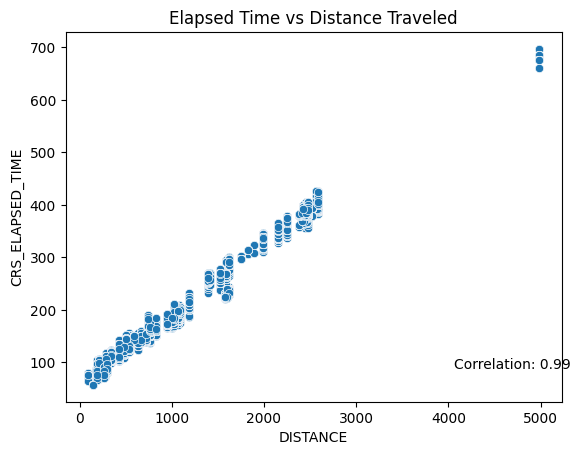

In [16]:
correlation = data_flights[attributes].corr().iloc[0, 1]
sns.scatterplot(data=data_flights, x="DISTANCE", y="CRS_ELAPSED_TIME")
plt.title("Elapsed Time vs Distance Traveled", loc="center")
plt.annotate(f'Correlation: {correlation:.2f}', xy=(0.9, 0.1), xycoords='axes fraction', ha='center', va='center') 

4-What is the correlation between the temperature and the number of flight delays?

No correlation.

Text(0.5, 1.0, 'Correlation between temperature and flight delay')

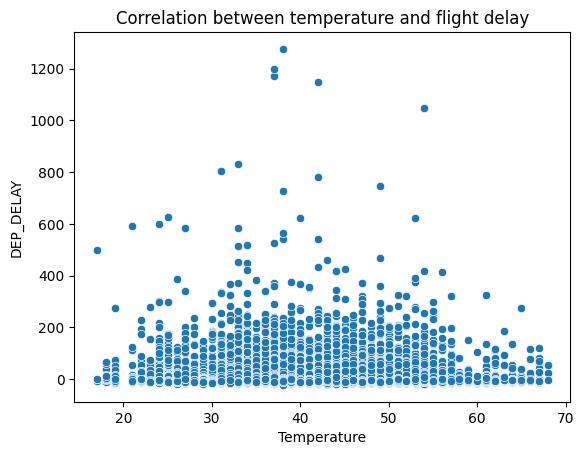

In [61]:
correlation = data_flights[attributes].corr().iloc[0, 1]
sns.scatterplot(data=data_flights, x="Temperature", y="DEP_DELAY")
plt.title("Correlation between temperature and flight delay", loc="center")


In [18]:
corr_matrix = data_flights.corr()
corr_matrix["DISTANCE"].sort_values(ascending=False)

C:\Users\jlapa\AppData\Local\Temp\ipykernel_21932\3276920681.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data_flights.corr()


DISTANCE            1.000000
CRS_ELAPSED_TIME    0.994465
TAXI_OUT            0.059856
sch_dep             0.059174
Humidity            0.015110
CRS_ARR_M           0.008520
Pressure            0.005692
DAY_OF_WEEK         0.002450
MONTH              -0.000144
DAY_OF_MONTH       -0.002762
Wind Gust          -0.009522
Temperature        -0.009923
Wind Speed         -0.010734
DEP_DELAY          -0.031507
DEP_TIME_M         -0.034604
CRS_DEP_M          -0.040963
sch_arr            -0.088793
Name: DISTANCE, dtype: float64

In [19]:
corr_matrix = data_flights.corr()
corr_matrix["Temperature"].sort_values(ascending=False)

C:\Users\jlapa\AppData\Local\Temp\ipykernel_21932\2357538868.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data_flights.corr()


Temperature         1.000000
MONTH               0.135682
CRS_ARR_M           0.101620
DEP_TIME_M          0.098105
CRS_DEP_M           0.086371
sch_arr             0.075958
Humidity            0.054401
DAY_OF_WEEK         0.013081
Wind Speed          0.010603
DISTANCE           -0.009923
CRS_ELAPSED_TIME   -0.016050
sch_dep            -0.022534
DEP_DELAY          -0.032261
Wind Gust          -0.039487
TAXI_OUT           -0.067574
DAY_OF_MONTH       -0.132457
Pressure           -0.376730
Name: Temperature, dtype: float64

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

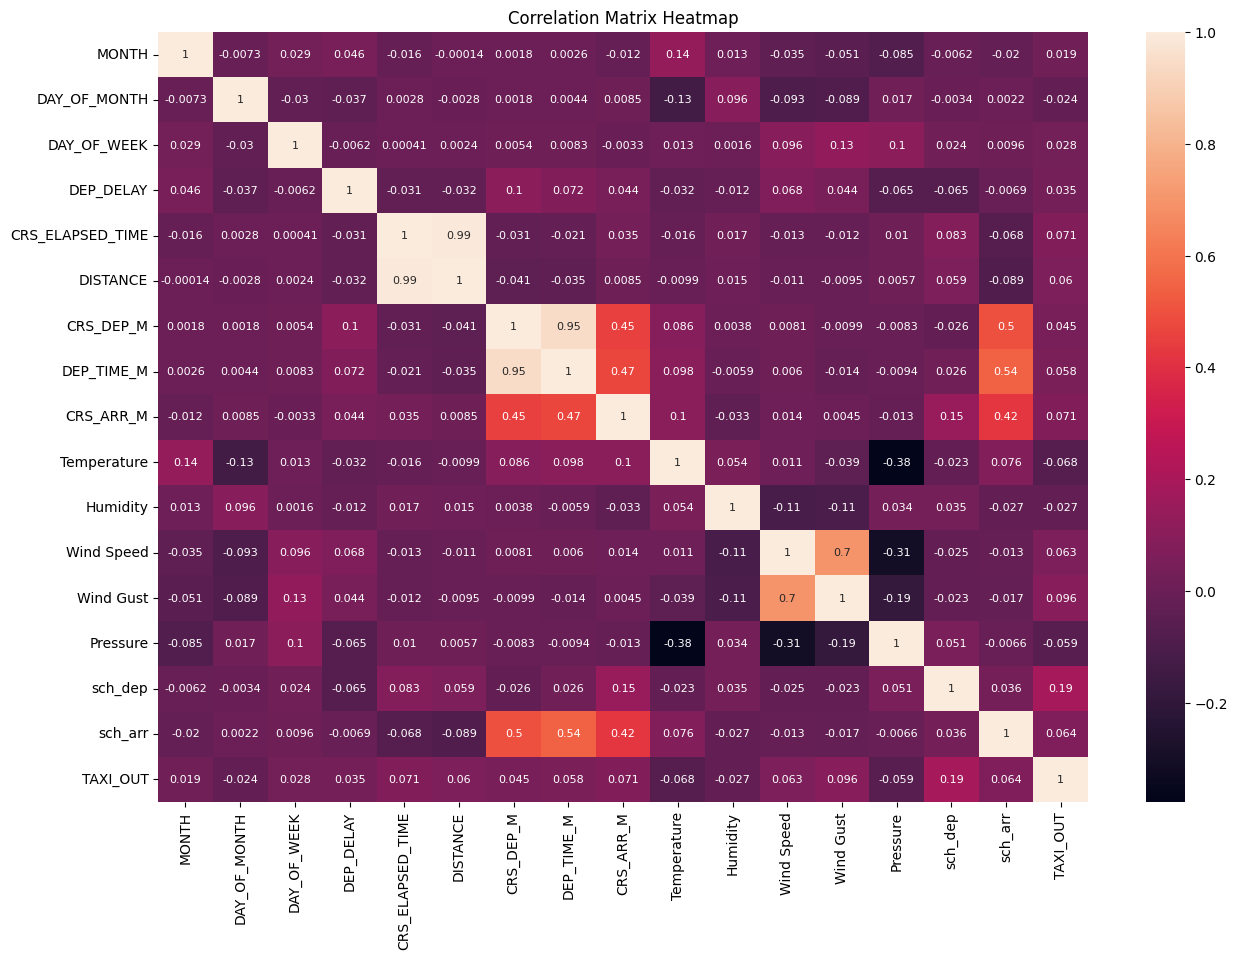

In [65]:

plt.figure(figsize=(15,10)) #to increase the size of the figure
sns.heatmap(corr_matrix, annot=True, annot_kws={'size': 8})
plt.title("Correlation Matrix Heatmap", loc="center")


5-What is the average taxi-out time for flights in the dataset?

The average taxi-out time for flights is 20minutes. 75% of the flights have a delay less than 25 minutes.

In [21]:
print(data_flights["TAXI_OUT"].describe())

count    28820.000000
mean        20.858570
std          6.851915
min          5.000000
25%         16.000000
50%         19.000000
75%         25.000000
max         41.000000
Name: TAXI_OUT, dtype: float64


Text(0.5, 0, 'Minutes')

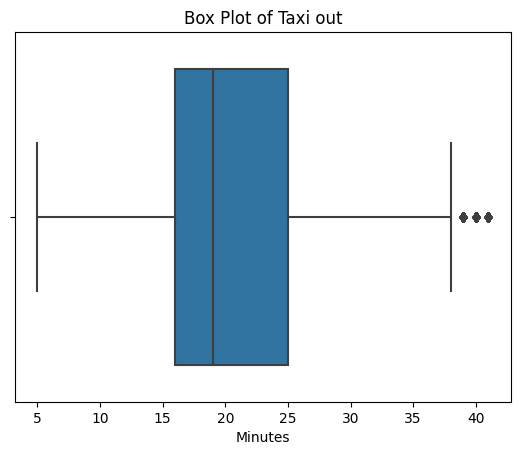

In [22]:
sns.boxplot(x=data_flights["TAXI_OUT"])
plt.title('Box Plot of Taxi out', loc="center")
plt.gca().set_facecolor('none') # To remove the gray lines
plt.xlabel('Minutes') # Add x-axis label

6-Which day of the week has the highest number of flight delays?
Day one, impossible to understand what day one of the week belongs to.

In [66]:
# group the data by day of the week
grouped = data_flights.groupby("DAY_OF_WEEK")

# calculate the mean of the dep_delay column for each group
mean_dep_delay = grouped["DEP_DELAY"].mean()

# find the day of the week with the highest average delay
max_day = mean_dep_delay.idxmax()

print("The day of the week with the highest number of flight delays is", max_day)

The day of the week with the highest number of flight delays is 6


### 6th Step: Looking if we have any missing data.

We have to values missing from wind variable

In [24]:
data_flights.isnull().sum()

MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
TAIL_NUM             0
DEST                 0
DEP_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
CRS_ARR_M            0
Temperature          0
Dew Point            0
Humidity             0
Wind                 2
Wind Speed           0
Wind Gust            0
Pressure             0
Condition            0
sch_dep              0
sch_arr              0
TAXI_OUT             0
dtype: int64

I handle missing values, in this case, for a categorical variable wind, by imputing missing values with a mode.

Other ways where could handle missing values:


Handling missing values for categorical variables typically involves either:

Deleting the records that have missing values: This approach can result in loss of information and should be used only when the number of missing values is very small relative to the total number of records.

Imputing the missing values: This involves replacing the missing values with a substituted value. There are several methods for imputing missing values for categorical variables, such as:

Mode imputation: This involves replacing the missing value with the most frequent value for that variable.

Random sample imputation: This involves selecting a random value from the observed values for that variable to replace the missing value.

Constant imputation: This involves replacing the missing value with a constant, such as 0 or a string like 'Missing'.

Using algorithms that can handle missing data: Some machine learning algorithms, such as random forests, can handle missing data without imputing missing values. This is because they are able to compute the missing values based on the information provided by other variables in the dataset.
It is important to consider the distribution of the missing values and the relationship between the missing values and other variables in the dataset before deciding on the best approach for handling missing values.


In [25]:
# Calculate the mode of the wind variable
mode = data_flights['Wind'].mode().values[0]

# Replace missing values in wind variable with mode
data_flights['Wind'].fillna(mode, inplace=True)


In [26]:
data_flights.isnull().sum()

MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
TAIL_NUM             0
DEST                 0
DEP_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
CRS_ARR_M            0
Temperature          0
Dew Point            0
Humidity             0
Wind                 0
Wind Speed           0
Wind Gust            0
Pressure             0
Condition            0
sch_dep              0
sch_arr              0
TAXI_OUT             0
dtype: int64

### 6th step: Select a Performance Measure

Since we are using a linear regression, both RMSE and MAE can be used.

Both are ways to measure the distance between two vectors: the vector of predictions and the vector of target values.

RMSE (Root Mean Square Error), gives an idea of how much error the system typically makes in its predictions, with high weight for larger errors.

If there are many outliers , you can use the mean absolute error (MAE, average absolute deviation)

### 7th Step: Check assumptions

The data is only available from the months November 2019 and December 2020, although the data includes months just us January?
Unable to understand some of the codes.

This dates were still affected by Covid-19 restrictions which might impact the insights we might collect.

Only cover winter months of nov and december. including christmas season.



### 8th step: Create linear regression
Create a test set because our brain is highlighy prone to overfitting- data snooping bias.

In [27]:
# Specify the X and y variables
X = data_flights['Wind Speed'].values.reshape(-1, 1)
y = data_flights['DEP_DELAY'].values.reshape(-1, 1)

In [28]:
#Train, test and split my data, test size is 30%, 70% is for training
X_train, X_test, Y_train, Y_test = train_test_split (X,y, test_size=0.3, random_state=32)

Always check and print to verify if it was well divided

In [29]:
print("X_Train size is:",X_train.shape)
print("X_Test size is:",X_test.shape)
print("Y_train size is:",Y_train.shape)
print("Y_Test size is:",Y_test.shape)

X_Train size is: (20174, 1)
X_Test size is: (8646, 1)
Y_train size is: (20174, 1)
Y_Test size is: (8646, 1)


In [30]:
linear_regressor = LinearRegression()  # create a linear regression object
linear_regressor.fit(X_train, Y_train)  # perform the linear regression

LinearRegression()

In [31]:
Y_pred = linear_regressor.predict(X_test)  # make the predictions based on the model

In [32]:
##Create a data frame fr predictions 
pd.DataFrame({'Actual': Y_test.reshape(-1), 'Predicted': Y_pred.reshape(-1)})

,Actual,Predicted
0,-8,6.650047
1,21,14.917895
2,-4,8.717009
3,-7,9.957186
4,1,6.236655
...,...,...
8641,3,1.275946
8642,1,6.650047
8643,-7,4.583085
8644,-2,10.783971


In [33]:
print('MAE:', metrics.mean_absolute_error(Y_test.reshape(-1), Y_pred.reshape(-1)))
print('MSE:', metrics.mean_squared_error(Y_test.reshape(-1), Y_pred.reshape(-1)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test.reshape(-1), Y_pred.reshape(-1))))
print('R2:', metrics.r2_score(Y_test.reshape(-1), Y_pred.reshape(-1)))

MAE: 16.660259436601304
MSE: 1684.8334447531947
RMSE: 41.04672270417207
R2: 0.004352259216216292


## Second linear regression: 
Deep delay and taxi out

In [34]:
# Specify the X and y variables
X = data_flights[['MONTH','DEP_DELAY','DAY_OF_WEEK','DAY_OF_MONTH','CRS_ELAPSED_TIME','DISTANCE','DEP_TIME_M','CRS_ARR_M','Temperature','Dew Point','Humidity','Wind Speed','Wind Gust','Pressure','sch_dep','sch_arr']]
y = data_flights['TAXI_OUT']

In [35]:
#Train, test and split my data, test size is 30%, 70% is for training
X_train, X_test, Y_train, Y_test = train_test_split (X,y, test_size=0.3, random_state=32)

In [36]:
print("X_Train size is:",X_train.shape)
print("X_Test size is:",X_test.shape)
print("Y_train size is:",Y_train.shape)
print("Y_Test size is:",Y_test.shape)

X_Train size is: (20174, 16)
X_Test size is: (8646, 16)
Y_train size is: (20174,)
Y_Test size is: (8646,)


In [37]:
linear_regressor = LinearRegression()  # create a linear regression object
linear_regressor.fit(X_train, Y_train)  # perform the linear regression

LinearRegression()

In [38]:
Y_pred = linear_regressor.predict(X_test)  # make the predictions based on the model

In [39]:
##Create a data frame fr predictions 
pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})

,Actual,Predicted
9362,23,22.378321
23840,14,22.181600
24617,22,22.884566
24899,19,24.680091
2007,20,18.605960
...,...,...
25794,24,21.228125
9596,21,18.504414
23574,26,18.437988
3772,19,23.834473


In [40]:
print('MAE:', metrics.mean_absolute_error(Y_test, Y_pred))
print('MSE:', metrics.mean_squared_error(Y_test, Y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R2:', metrics.r2_score(Y_test, Y_pred))

MAE: 5.2575574736982595
MSE: 43.681545748080154
RMSE: 6.609201596870847
R2: 0.08143392787782244


Linear Regression

In [78]:
# Specify the X and y variables
X = data_flights[['DISTANCE',]]
y = data_flights['CRS_ELAPSED_TIME']

In [79]:
print("X_Train size is:",X_train.shape)
print("X_Test size is:",X_test.shape)
print("Y_train size is:",Y_train.shape)
print("Y_Test size is:",Y_test.shape)

X_Train size is: (20174, 16)
X_Test size is: (8646, 16)
Y_train size is: (20174,)
Y_Test size is: (8646,)


In [80]:
linear_regressor = LinearRegression()  # create a linear regression object
linear_regressor.fit(X_train, Y_train)  # perform the linear regression

LinearRegression()

In [81]:
##Create a data frame fr predictions 
pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})

,Actual,Predicted
9362,23,22.378321
23840,14,22.181600
24617,22,22.884566
24899,19,24.680091
2007,20,18.605960
...,...,...
25794,24,21.228125
9596,21,18.504414
23574,26,18.437988
3772,19,23.834473


In [82]:
print('MAE:', metrics.mean_absolute_error(Y_test, Y_pred))
print('MSE:', metrics.mean_squared_error(Y_test, Y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R2:', metrics.r2_score(Y_test, Y_pred))

MAE: 5.2575574736982595
MSE: 43.681545748080154
RMSE: 6.609201596870847
R2: 0.08143392787782244


##Random Forest Regressor

In [56]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=32)
rf_reg.fit(X_train, Y_train)

RandomForestRegressor(random_state=32)

In [57]:
print("X_Train size is:",X_train.shape)
print("X_Test size is:",X_test.shape)
print("Y_train size is:",Y_train.shape)
print("Y_Test size is:",Y_test.shape)

X_Train size is: (20174, 16)
X_Test size is: (8646, 16)
Y_train size is: (20174,)
Y_Test size is: (8646,)


In [58]:
rf_reg_pred = rf_reg.predict(X_test)

In [59]:
pd.DataFrame({'Actual': Y_test, 'Predicted': rf_reg_pred})

,Actual,Predicted
9362,23,23.65
23840,14,18.17
24617,22,21.54
24899,19,18.12
2007,20,22.19
...,...,...
25794,24,22.92
9596,21,17.94
23574,26,21.76
3772,19,21.53


In [60]:
## mneasuring accuracy
print('MAE:', metrics.mean_absolute_error(Y_test, rf_reg_pred))
print('MSE:', metrics.mean_squared_error(Y_test, rf_reg_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, rf_reg_pred)))
print('R2:', metrics.r2_score(Y_test, rf_reg_pred))

MAE: 4.449228544991905
MSE: 32.96960954198473
RMSE: 5.741916887415276
R2: 0.30669200877091607


## ridge regression


In [72]:
model_ridge = Ridge(alpha=1, random_state= 32)
model_ridge.fit(X_train, Y_train)

Ridge(alpha=1, random_state=32)

In [73]:
## make predictions
pred_ridge = model_ridge.predict(X_test)
pd.DataFrame({'Actual': Y_test, 'Predicted': pred_ridge})

,Actual,Predicted
9362,23,22.378321
23840,14,22.181767
24617,22,22.884321
24899,19,24.680147
2007,20,18.606059
...,...,...
25794,24,21.228152
9596,21,18.504142
23574,26,18.437951
3772,19,23.834471


In [74]:
## mneasuring accuracy
print('MAE:', metrics.mean_absolute_error(Y_test, pred_ridge))
print('MSE:', metrics.mean_squared_error(Y_test, pred_ridge))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, pred_ridge)))
print('R2:', metrics.r2_score(Y_test, pred_ridge))

MAE: 5.25755890967032
MSE: 43.681562834651345
RMSE: 6.609202889505764
R2: 0.08143356856946193


##Lasson Regression


In [75]:
## Lasso Regression
model_lasso = Lasso(alpha=0.99)
model_lasso.fit(X_train, Y_train)

Lasso(alpha=0.99)

In [76]:
pred_lasso = model_lasso.predict(X_test)
pd.DataFrame({'Actual': Y_test, 'Predicted': pred_lasso})

,Actual,Predicted
9362,23,22.189917
23840,14,22.678784
24617,22,22.855212
24899,19,24.761252
2007,20,19.056895
...,...,...
25794,24,21.775877
9596,21,18.771716
23574,26,19.497792
3772,19,23.402605


In [77]:
print('MAE:', metrics.mean_absolute_error(Y_test, pred_lasso))
print('MSE:', metrics.mean_squared_error(Y_test, pred_lasso))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, pred_lasso)))
print('R2:', metrics.r2_score(Y_test, pred_lasso))

MAE: 5.2814875700866715
MSE: 44.03085817108179
RMSE: 6.635575195194595
R2: 0.07408834211969495
